## Importing libraries

In [38]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [39]:
num_dancers = 11
num_performances = 10000
epsilon = 0.2

In [40]:
dancer_names = [
    "Hrithik Roshan", "Madhuri Dixit", "Prabhu Deva", "Deepika Padukone", 
    "Joaquin Phoenix", "Jennifer Lawrence", "Channing Tatum", "Beyoncé",
    "Nora Fatehi", "Aishwarya Rai", "John Travolta"
]

In [41]:
def get_performance_conditions():
    conditions = ["Formal event", "Informal event", "Outdoor event", "Indoor event", "High energy", "Low energy", "Night"]
    return random.choice(conditions)


## Assigning weight based on performance

In [42]:
def get_dancer_performance(dancer, condition):
    performance = np.random.rand()   
    if condition == "Formal event":
        performance += 0.1 * (dancer % 3)   
    elif condition == "Informal event":
        performance -= 0.1 * (dancer % 2)  
    elif condition == "Outdoor event":
        performance += 0.05 * (dancer % 4)   
    elif condition == "Indoor event":
        performance += 0.15 * (dancer % 5)   
    elif condition == "High energy":
        performance -= 0.1 * (dancer % 3)  
    elif condition == "Low energy":
        performance -= 0.2 * (dancer % 2)   
    elif condition == "Night":
        performance += 0.05 * (dancer % 4)  
    return max(0, performance)   


## Algorithm 1: Epsilon greedy bandit

In [43]:
def epsilon_greedy_bandit():
    rewards = np.zeros(num_dancers)
    counts = np.zeros(num_dancers)
    cumulative_rewards = np.zeros(num_performances)

    total_reward = 0
    for performance in range(num_performances):
        condition = get_performance_conditions()
        
        if np.random.rand() < epsilon:  # Explore
            dancer = np.random.choice(num_dancers)
        else:  # Exploit
            dancer = np.argmax(rewards / (counts + 1e-5))
        
        reward = get_dancer_performance(dancer, condition)
        counts[dancer] += 1
        rewards[dancer] += reward
        total_reward += reward
        cumulative_rewards[performance] = total_reward

    estimated_rates = rewards / (counts + 1e-5)
    return estimated_rates, counts, cumulative_rewards, rewards


## Algorithm 2: UCB bandit

In [44]:
def ucb_bandit():
    rewards = np.zeros(num_dancers)
    counts = np.zeros(num_dancers)
    total_count = 0
    cumulative_rewards = np.zeros(num_performances)

    total_reward = 0
    for performance in range(num_performances):
        condition = get_performance_conditions()

        if total_count < num_dancers:
            dancer = total_count 
        else:
            ucb_values = rewards / (counts + 1e-5) + np.sqrt(2 * np.log(total_count + 1) / (counts + 1e-5))
            dancer = np.argmax(ucb_values)
        
        reward = get_dancer_performance(dancer, condition)
        counts[dancer] += 1
        rewards[dancer] += reward
        total_reward += reward
        cumulative_rewards[performance] = total_reward
        total_count += 1

    estimated_rates = rewards / (counts + 1e-5)
    return estimated_rates, counts, cumulative_rewards, rewards


## Algorithm 3: Random Selection bandit

In [45]:
def random_selection_bandit():
    cumulative_rewards = np.zeros(num_performances)
    rewards = np.zeros(num_dancers)
    counts = np.zeros(num_dancers)
    total_reward = 0

    for performance in range(num_performances):
        condition = get_performance_conditions()
        dancer = np.random.choice(num_dancers)  
        reward = get_dancer_performance(dancer, condition)
        
        counts[dancer] += 1
        rewards[dancer] += reward
        total_reward += reward
        cumulative_rewards[performance] = total_reward

    estimated_rates = rewards / (counts + 1e-5)
    return estimated_rates, counts, cumulative_rewards, rewards



In [46]:
estimated_rates_epsilon_greedy, selections_epsilon_greedy, cumulative_rewards_epsilon_greedy, rewards_epsilon_greedy = epsilon_greedy_bandit()
estimated_rates_ucb, selections_ucb, cumulative_rewards_ucb, rewards_ucb = ucb_bandit()
estimated_rates_random, selections_random, cumulative_rewards_random, rewards_random = random_selection_bandit()


In [47]:
avg_reward_epsilon_greedy = cumulative_rewards_epsilon_greedy / (np.arange(1, num_performances + 1))
avg_reward_ucb = cumulative_rewards_ucb / (np.arange(1, num_performances + 1))
avg_reward_random = cumulative_rewards_random / (np.arange(1, num_performances + 1))


## Epsilon-Greedy Estimated Conversion Rates:

In [48]:
print("Epsilon-Greedy Estimated Conversion Rates:")
for i in range(num_dancers):
    print(f"{dancer_names[i]}: Average reward = {estimated_rates_epsilon_greedy[i]:.2f}, Number ofSelections = {selections_epsilon_greedy[i]}")


Epsilon-Greedy Estimated Conversion Rates:
Hrithik Roshan: Average reward = 0.56, Number ofSelections = 194.0
Madhuri Dixit: Average reward = 0.51, Number ofSelections = 170.0
Prabhu Deva: Average reward = 0.57, Number ofSelections = 3899.0
Deepika Padukone: Average reward = 0.55, Number ofSelections = 189.0
Joaquin Phoenix: Average reward = 0.57, Number ofSelections = 761.0
Jennifer Lawrence: Average reward = 0.48, Number ofSelections = 209.0
Channing Tatum: Average reward = 0.57, Number ofSelections = 1095.0
Beyoncé: Average reward = 0.57, Number ofSelections = 273.0
Nora Fatehi: Average reward = 0.57, Number ofSelections = 1979.0
Aishwarya Rai: Average reward = 0.57, Number ofSelections = 1052.0
John Travolta: Average reward = 0.50, Number ofSelections = 179.0


## UCB Estimated Conversion Rates:

In [49]:
print("\nUCB Estimated Conversion Rates:")
for i in range(num_dancers):
    print(f"{dancer_names[i]}: Average reward = {estimated_rates_ucb[i]:.2f}, Number ofSelections = {selections_ucb[i]}")



UCB Estimated Conversion Rates:
Hrithik Roshan: Average reward = 0.50, Number ofSelections = 545.0
Madhuri Dixit: Average reward = 0.50, Number ofSelections = 526.0
Prabhu Deva: Average reward = 0.57, Number ofSelections = 1212.0
Deepika Padukone: Average reward = 0.57, Number ofSelections = 1247.0
Joaquin Phoenix: Average reward = 0.57, Number ofSelections = 1279.0
Jennifer Lawrence: Average reward = 0.48, Number ofSelections = 423.0
Channing Tatum: Average reward = 0.53, Number ofSelections = 770.0
Beyoncé: Average reward = 0.53, Number ofSelections = 758.0
Nora Fatehi: Average reward = 0.55, Number ofSelections = 977.0
Aishwarya Rai: Average reward = 0.58, Number ofSelections = 1469.0
John Travolta: Average reward = 0.54, Number ofSelections = 794.0


## Random Selection Estimated Conversion Rates:

In [50]:
print("\nRandom Selection Estimated Conversion Rates:")
for i in range(num_dancers):
    print(f"{dancer_names[i]}: Average reward = {estimated_rates_random[i]:.2f}, Number ofSelections = {selections_random[i]}")



Random Selection Estimated Conversion Rates:
Hrithik Roshan: Average reward = 0.50, Number ofSelections = 938.0
Madhuri Dixit: Average reward = 0.50, Number ofSelections = 903.0
Prabhu Deva: Average reward = 0.58, Number ofSelections = 884.0
Deepika Padukone: Average reward = 0.57, Number ofSelections = 959.0
Joaquin Phoenix: Average reward = 0.59, Number ofSelections = 861.0
Jennifer Lawrence: Average reward = 0.49, Number ofSelections = 894.0
Channing Tatum: Average reward = 0.54, Number ofSelections = 965.0
Beyoncé: Average reward = 0.53, Number ofSelections = 883.0
Nora Fatehi: Average reward = 0.57, Number ofSelections = 888.0
Aishwarya Rai: Average reward = 0.55, Number ofSelections = 915.0
John Travolta: Average reward = 0.52, Number ofSelections = 910.0


## Average Rewards for Each Algorithm:

In [51]:
print("\nAverage Rewards for Each Algorithm:")
print(f"Epsilon-Greedy Average Reward: {np.mean(avg_reward_epsilon_greedy):.4f}")
print(f"UCB Average Reward: {np.mean(avg_reward_ucb):.4f}")
print(f"Random Selection Average Reward: {np.mean(avg_reward_random):.4f}")



Average Rewards for Each Algorithm:
Epsilon-Greedy Average Reward: 0.5707
UCB Average Reward: 0.5446
Random Selection Average Reward: 0.5438


## Total Cumulative Rewards:

In [52]:
print("\nTotal Cumulative Rewards:")
print(f"Epsilon-Greedy: {sum(cumulative_rewards_epsilon_greedy):.2f}")
print(f"UCB: {sum(cumulative_rewards_ucb):.2f}")
print(f"Random Selection: {sum(cumulative_rewards_random):.2f}")



Total Cumulative Rewards:
Epsilon-Greedy: 28521829.28
UCB: 27339088.00
Random Selection: 27133651.15


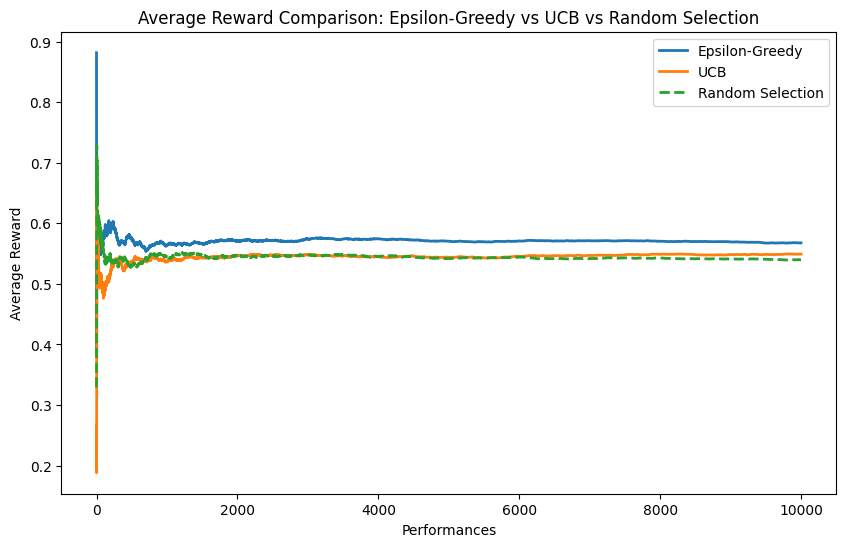

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(avg_reward_epsilon_greedy, label='Epsilon-Greedy', linewidth=2)
plt.plot(avg_reward_ucb, label='UCB', linewidth=2)
plt.plot(avg_reward_random, label='Random Selection', linestyle='--', linewidth=2)
plt.xlabel('Performances')
plt.ylabel('Average Reward')
plt.title('Average Reward Comparison: Epsilon-Greedy vs UCB vs Random Selection')
plt.legend()
plt.show()


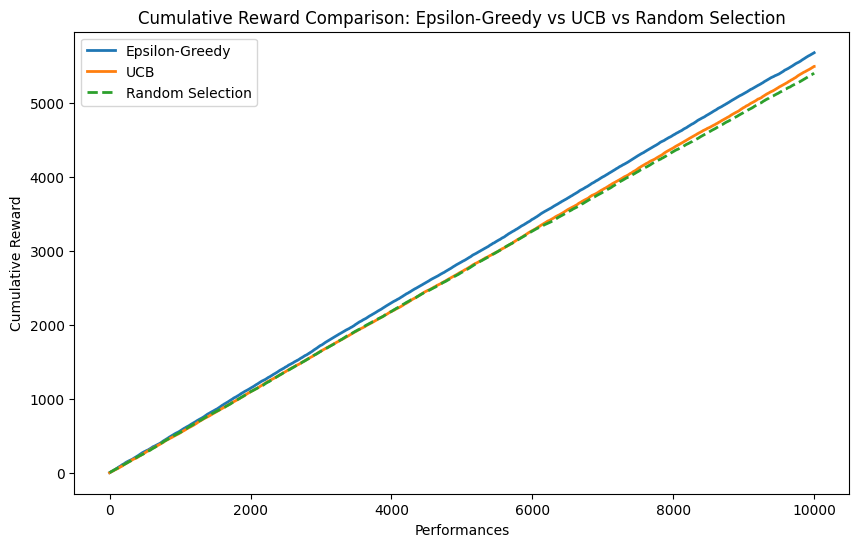

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards_epsilon_greedy, label='Epsilon-Greedy', linewidth=2)
plt.plot(cumulative_rewards_ucb, label='UCB', linewidth=2)
plt.plot(cumulative_rewards_random, label='Random Selection', linestyle='--', linewidth=2)
plt.xlabel('Performances')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Comparison: Epsilon-Greedy vs UCB vs Random Selection')
plt.legend()
plt.show()